Exercice 1

On considère la courbe de Bézier cubique Γ𝑎 définie par les points de contrôle suivants :
𝐴 = (0, 1), 𝐵 = (0, 0), 𝐶 = (𝑎, 0), 𝐷 = (−1, 1)
1) Donner les équations paramétriques de Γ𝑎.
2) Montrer que les points d’ordonnées minimum sont tous situés sur une même droite.
3) Tracer sur un même graphique les courbes Γ𝑎 pour 𝑎 ∈ {−3, −2, −1, 0}.
4) Déterminer la valeur de 𝑎 pour laquelle Γ𝑎 présente un point de rebroussement (le vecteur vitesse s’annule), puis ajouter
cette courbe aux courbes précédentes en faisant apparaitre les points de contrôle

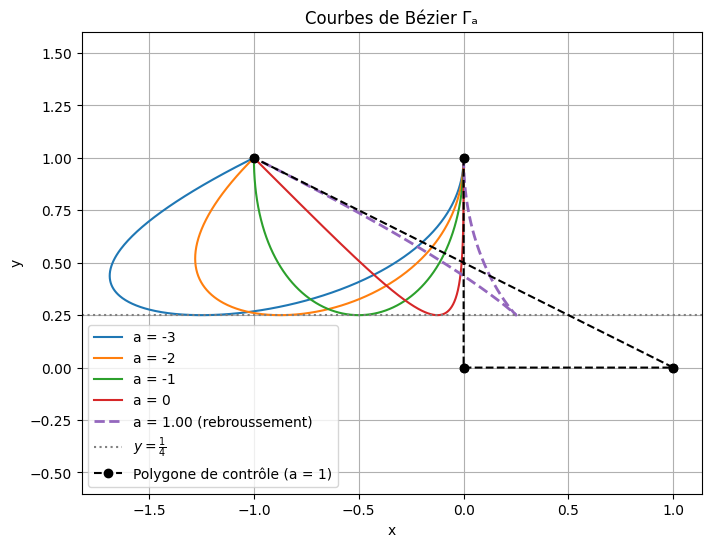

In [225]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètre
t = np.linspace(0, 1, 400)

# Fonction courbe de Bézier
def bezier(a, t):
    x = 3*a*t**2 - (3*a + 1)*t**3
    y = 1 - 3*t + 3*t**2
    return x, y

# Valeurs de a demandées
a_values = [-3, -2, -1, 0]
a_rebroussement = 1  # Valeur de a pour le point de rebroussement

plt.figure(figsize=(8, 6))

# Tracé des courbes pour a ∈ {-3, -2, -1, 0}
for a in a_values:
    x, y = bezier(a, t)
    plt.plot(x, y, label=f"a = {a}")

# Tracé de la courbe avec point de rebroussement
x, y = bezier(a_rebroussement, t)
plt.plot(x, y, '--', linewidth=2, label=f"a = {a_rebroussement:.2f} (rebroussement)")

# Droite y = 1/4 (ordonnée minimale)
plt.axhline(0.25, color='gray', linestyle=':', label=r"$y=\frac{1}{4}$")

# Points de contrôle (exemple avec a = 1)
A = (0, 1)
B = (0, 0)
C = (a_rebroussement, 0)
D = (-1, 1)

Px = [A[0], B[0], C[0], D[0]]
Py = [A[1], B[1], C[1], D[1]]

plt.plot(Px, Py, 'ko--', label="Polygone de contrôle (a = 1)")
plt.scatter(Px, Py, color='black')

# Mise en forme
plt.xlabel("x")
plt.ylabel("y")
plt.title("Courbes de Bézier Γₐ")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.show()


Exercice 2

L’objectif de cet exercice est de construire une spline cubique fermée, pilotée par les points de contrôles suivants :

𝑃1 = (−2, 1), 𝑃2 = (−1, 3), 𝑃3 = (2, 4), 𝑃4 = (4, 2), 𝑃5 = (2, 0), 𝑃6 = (−1, −1)

Pour cela, on procèdera de la façon suivante :

- On trace le polygone de pilotage constitué par les points 𝑃1, … , 𝑃𝑛 , ici 𝑛 = 6

- On partage chaque côté du polygone en introduisant les points 𝐵𝑘 et 𝐶𝑘 définis par :

𝐵𝑘 = 1/3*(2𝑃𝑘 + 𝑃𝑘+1), 𝑘 ∈ ⟦1, 𝑛 − 1⟧

𝐵𝑛 = 1/3*(2𝑃𝑛 + 𝑃1)

et 

𝐶𝑘 = 1/3*(𝑃𝑘 + 2𝑃𝑘+1), 𝑘 ∈ ⟦1, 𝑛 − 1⟧

𝐶𝑛 = 1/3*(𝑃𝑛 + 2𝑃1)

- On introduit les points 𝐴𝑘, milieux des segments [𝐶𝑘𝐵𝑘+1], c’est-à-dire :

𝐴𝑘 = 1/2*(𝐶𝑘 + 𝐵𝑘+1), 𝑘 ∈ ⟦1, 𝑛 − 1⟧

𝐴𝑛 = 1/2*(𝐶𝑛 + 𝐵1)

- On affiche les nouveaux points 𝐵𝑘, 𝐶𝑘, 𝐴𝑘 

- On construit les courbes de Bézier cubiques pilotées par (𝐴𝑘, 𝐵𝑘+1, 𝐶𝑘+1, 𝐴𝑘+1) et on les affiche

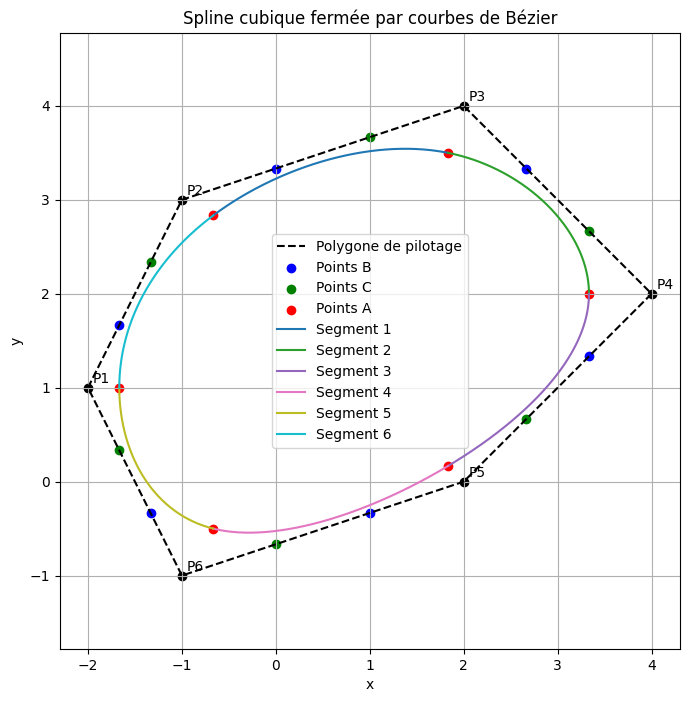

In [226]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Points de pilotage
# -----------------------------
P = np.array([
    [-2,  1],
    [-1,  3],
    [ 2,  4],
    [ 4,  2],
    [ 2,  0],
    [-1, -1]
])

n = len(P)

# -----------------------------
# Calcul des points B_k et C_k
# -----------------------------
B = np.zeros_like(P, dtype=float)
C = np.zeros_like(P, dtype=float)

for k in range(n):
    Pk = P[k]
    Pkp1 = P[(k + 1) % n]   # fermeture du polygone
    B[k] = (2*Pk + Pkp1) / 3
    C[k] = (Pk + 2*Pkp1) / 3

# -----------------------------
# Calcul des points A_k
# -----------------------------
A = np.zeros_like(P, dtype=float)

for k in range(n):
    A[k] = (C[k] + B[(k + 1) % n]) / 2

# -----------------------------
# Fonction Bézier cubique
# -----------------------------
def bezier(P0, P1, P2, P3, t):
    return ((1 - t)**3)[:, None] * P0 + \
           (3 * (1 - t)**2 * t)[:, None] * P1 + \
           (3 * (1 - t) * t**2)[:, None] * P2 + \
           (t**3)[:, None] * P3

t = np.linspace(0, 1, 300)

# -----------------------------
# Tracés
# -----------------------------
plt.figure(figsize=(8, 8))

# Polygone de pilotage
P_closed = np.vstack([P, P[0]])
plt.plot(P_closed[:, 0], P_closed[:, 1], 'k--', label="Polygone de pilotage")
plt.scatter(P[:, 0], P[:, 1], color='black')
for i, p in enumerate(P):
    plt.text(p[0]+0.05, p[1]+0.05, f"P{i+1}")

# Points B, C, A
plt.scatter(B[:, 0], B[:, 1], color='blue', label="Points B")
plt.scatter(C[:, 0], C[:, 1], color='green', label="Points C")
plt.scatter(A[:, 0], A[:, 1], color='red', label="Points A")

# Courbes de Bézier cubiques
colors = plt.cm.tab10(np.linspace(0, 1, n))
for k in range(n):
    P0 = A[k]
    P1 = B[(k + 1) % n]
    P2 = C[(k + 1) % n]
    P3 = A[(k + 1) % n]

    curve = bezier(P0, P1, P2, P3, t)
    plt.plot(curve[:, 0], curve[:, 1], color=colors[k],
             label=f"Segment {k+1}")


# Mise en forme
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.title("Spline cubique fermée par courbes de Bézier")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


Exercice 3 

Ecrire un programme Python permettant de reproduire les figures III.5, IV.1 et V.3 du cours (on utilisera un traitement matriciel).

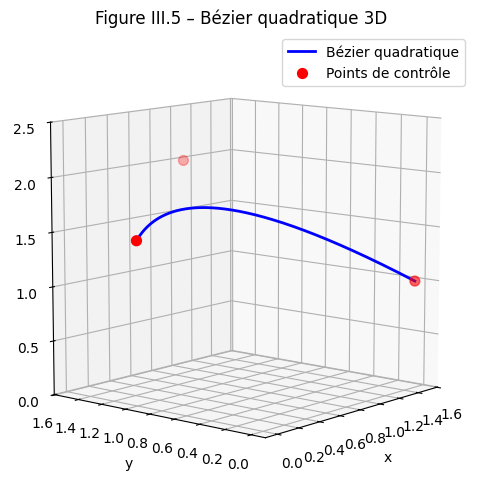

In [227]:
import numpy as np
import matplotlib.pyplot as plt


# -------- Figure III.5 --------
P = np.array([
    [3/2, 0,   1],
    [1,   3/2, 2],
    [0,   1,   3/2]
])

t = np.linspace(0, 1, 400)

B = np.vstack(((1 - t)**2,
               2*t*(1 - t),
               t**2)).T

curve = B @ P
plt.ion()

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(curve[:,0], curve[:,1], curve[:,2],
        color='blue', linewidth=2, label="Bézier quadratique")
ax.scatter(P[:,0], P[:,1], P[:,2],
           color='red', s=50, label="Points de contrôle")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Figure III.5 – Bézier quadratique 3D")

ax.set_zlim(0, 2.5)
ax.set_box_aspect([1, 1, 1])   # 🔑 CORRECTION IMPORTANTE
ax.legend()

ax.view_init(elev=10, azim=220)
plt.show()



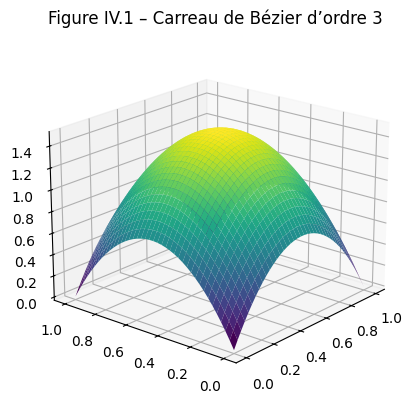

In [228]:
# -------- Figure IV.1 --------
X = np.array([
    [0,0,0,0],
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
]) / 3

Y = np.array([
    [0,1,2,3],
    [0,1,2,3],
    [0,1,2,3],
    [0,1,2,3]
]) / 3

Z = np.array([
    [0,1,1,0],
    [1,2,2,1],
    [1,2,2,1],
    [0,1,1,0]
])

def bernstein3(t):
    return np.array([
        (1 - t)**3,
        3*t*(1 - t)**2,
        3*t**2*(1 - t),
        t**3
    ])

u = np.linspace(0, 1, 40)
v = np.linspace(0, 1, 40)

Xu, Yu, Zu = np.zeros((40,40)), np.zeros((40,40)), np.zeros((40,40))

for i, ui in enumerate(u):
    Bu = bernstein3(ui)
    for j, vj in enumerate(v):
        Bv = bernstein3(vj)
        Xu[i,j] = Bu @ X @ Bv
        Yu[i,j] = Bu @ Y @ Bv
        Zu[i,j] = Bu @ Z @ Bv

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Xu, Yu, Zu, cmap='viridis')
ax.set_title("Figure IV.1 – Carreau de Bézier d’ordre 3")
ax.view_init(elev=20, azim=220)
plt.show()


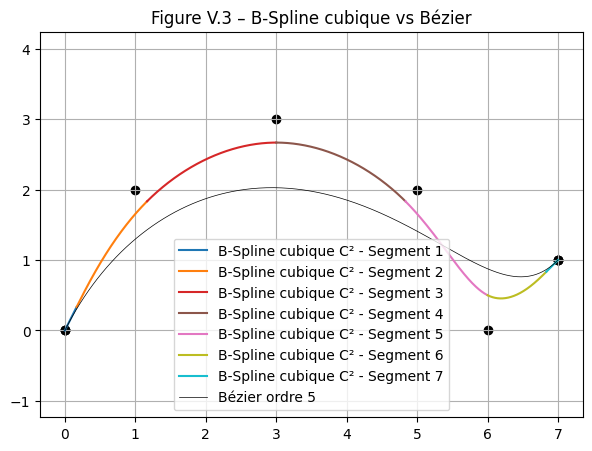

In [229]:
# -------- Figure V.3 --------
P = np.array([
    [0,0],
    [0,0],
    [0,0],
    [1,2],
    [3,3],
    [5,2],
    [6,0],
    [7,1],
    [7,1],
    [7,1]
])

t = np.linspace(0, 1, 400)

B5 = np.vstack([
    (1-t)**5,
    5*t*(1-t)**4,
    10*t**2*(1-t)**3,
    10*t**3*(1-t)**2,
    5*t**4*(1-t),
    t**5
]).T

bezier5 = B5 @ P[2:8]

M = (1/6) * np.array([
    [-1,  3, -3, 1],
    [ 3, -6,  3, 0],
    [-3,  0,  3, 0],
    [ 1,  4,  1, 0]
])


plt.figure(figsize=(7,5))

bspline = []

num_segments = len(P) - 3
colors = plt.cm.tab10(np.linspace(0, 1, num_segments))
for k in range(num_segments):
    G = P[k:k+4]
    T = np.vstack([t**3, t**2, t, np.ones_like(t)]).T
    curve = T @ M @ G
    bspline.append(curve)    
    plt.plot(curve[:, 0], curve[:, 1], color=colors[k], label=f"B-Spline cubique C² - Segment {k+1}")

bspline = np.vstack(bspline)


plt.plot(bezier5[:,0], bezier5[:,1], 'black', linewidth=0.5, label="Bézier ordre 5")
plt.scatter(P[:,0], P[:,1], color='black')
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.title("Figure V.3 – B-Spline cubique vs Bézier")
plt.show()
